<h2>Multivariate Linear Regression</h2>

<p>This notebook covers a Python-based solution for the first programming exercise of the machine learning class on Coursera. 
Please refer to the  Please refer to the [exercise text](exercises/ex1.pdf) for detailed descriptions and equations.", for detailed descriptions and equations.
In this exercise we'll implement simple linear regression using gradient descent and 
apply it to an example problem. We'll also extend our implementation to handle multiple 
variables and apply it to a slightly more difficult example.</p>

In this part, you will implement linear regression with multiple variables to
predict the prices of houses. Suppose you are selling your house and you
want to know what a good market price would be. One way to do this is to
first collect information on recent houses sold and make a model of housing
prices.

<h3> Importing data </h3>

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline
import os
path = os.getcwd() + '/data/ex1data2.txt'  
data = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])  
data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [90]:
data.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


Notice that the scale of the values for each variable is vastly different. A house will typically have 2-5 bedrooms but may have anywhere from hundreds to thousands of square feet. If we were to run our regression algorithm on this data as-is, the "size" variable would be weighted too heavily and would end up dwarfing any contributions from the "number of bedrooms" feature. To fix this, we need to do something called "feature normalization". That is, we need to adjust the scale of the features to level the playing field. One way to do this is by subtracting from each value in a feature the mean of that feature, and then dividing by the standard deviation. Fortunately this is one line of code using pandas.

\begin{equation}
 z = \frac{x - \mu}{\sigma} 
\end{equation}

In [91]:
data = (data - data.mean()) / data.std()  
data.head() 

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [92]:
data.describe()

,Size,Bedrooms,Price
count,4.700000e+01,4.700000e+01,4.700000e+01
mean,3.779483e-17,2.185013e-16,-7.086530e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.445423e+00,-2.851859e+00,-1.363666e+00
25%,-7.155897e-01,-2.236752e-01,-7.238702e-01
50%,-1.417900e-01,-2.236752e-01,-3.239979e-01
75%,3.376348e-01,1.090417e+00,3.521863e-01
max,3.117292e+00,2.404508e+00,2.874981e+00


<h3> Plotting the data </h3>

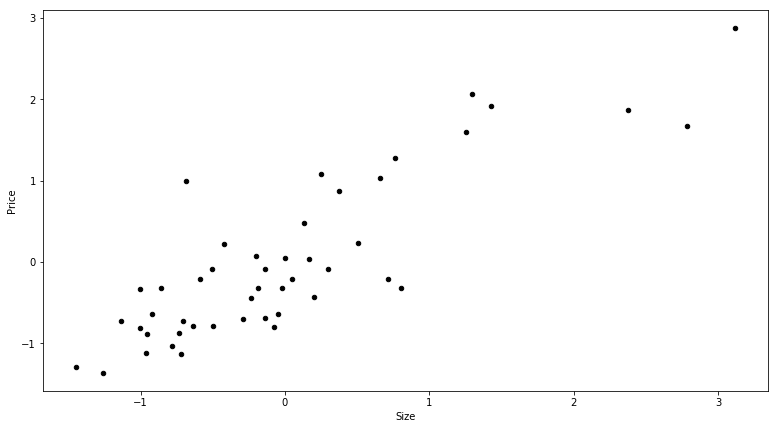

In [93]:
data.plot(kind='scatter', x='Size', y='Price',figsize=(13,7),c='black')

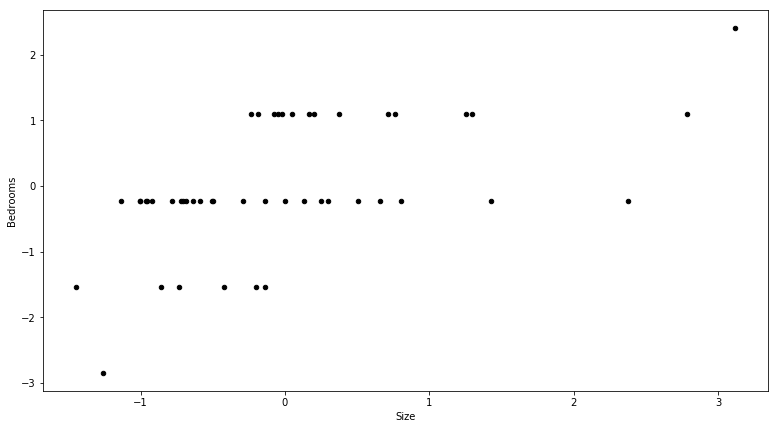

In [94]:
data.plot(kind='scatter', x='Size', y='Bedrooms',figsize=(13,7),c='black')

<b>Hypothesis</b>

\begin{equation}
 h_\theta(x)= \theta^T = \theta_0 + \theta_1x_1 + \theta_2x_2 + ....... + \theta_nx_n
\end{equation}

<b>Cost function</b>

\begin{equation}
 J(\theta_1,\theta_2,....,\theta_n) = J(\theta) =\frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^i)-y^i)^2 
\end{equation}

In [95]:
def costFunction(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [96]:
def gradientDescent(X, y, theta, alpha, iters):  
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = costFunction(X, y, theta)

    return theta, cost

Look closely at the line of code calculating the error term: error = (X * theta.T) - y. It might not be obvious at first but we're using all matrix operations! This is the power of linear algebra at work. This code will work correctly no matter how many variables (columns) are in X, as long as the number of parameters in theta agree. Similarly, it will compute the error term for every row in X as long as the number of rows in y agree. On top of that, it's a very efficient calculation. This is a powerful way to apply ANY expression to a large number of instances at once.
Since both our gradient descent and cost function are using matrix operations, there is in fact no change to the code necessary to handle multiple linear regression. Let's test it out. We first need to perform a few initializations to create the appropriate matrices to pass to our functions.

In [97]:
# add ones column
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]  
X2 = data.iloc[:,0:cols-1]  
y2 = data.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)  
y2 = np.matrix(y2.values)  
theta = np.matrix(np.array([0,0,0])) 

alpha = 0.01  
iters = 1000

In [98]:
# perform linear regression on the data set
z2, cost = gradientDescent(X2, y2, theta, alpha, iters)
print("Theta is :",z2)

Theta is : [[ -1.10797896e-16   8.78503652e-01  -4.69166570e-02]]


In [99]:
# get the cost (error) of the model
costFunction(X2, y2, z2)

0.13070336960771892

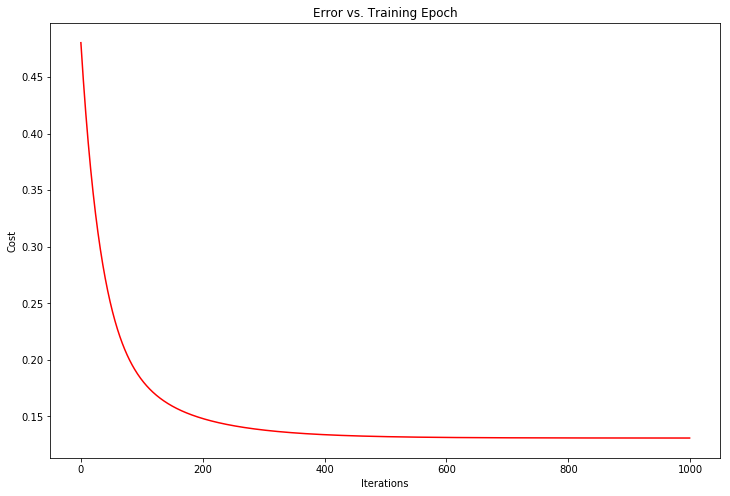

In [100]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch') 

<h3> Try to perform this method using this website https://crsmithdev.com/blog/ml-linear-regression/ </h3>